# BT2103 GROUP ASSIGNMENT

#### Introduction to the Dataset and Problem Statement

The cash and credit card debt problem that Taiwan's credit card issuers experienced in recent years is predicted to peak in the third quarter of 2006 (Chou, 2006). Taiwan's card-issuing banks overissued cash and credit cards to unqualified applicants in an effort to gain market dominance. In addition, most cardholders, regardless of their capacity to pay back, abused their cards for consumption and racked up large credit and cash-card debt. The crisis damaged consumer confidence in finance, and therefore presents a significant problem for both banks and cardholders.

Crisis management and risk prediction take place upstream and downstream in a mature financial system, respectively. The main goal of risk prediction is to lessen the harm and uncertainty caused by corporate performance or individual customer credit risk by using financial information, such as business financial statements, customer transaction and repayment histories, etc.

Therefore, with extensive data collected from the period of April to September in 2005, this report aims to build a predictive model to accurately forecast clients who have tendencies to default on the bank and thus ensures the profitability and stability of banks. 

In the dataset, there are 23 explanatory variables, together with a dependent variable of client's default status. The detailed description is as follows:
X1: Amount of the given credit (NT dollar): it includes
both the individual consumer credit and his/her family
(supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university;
3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6–X11: History of past payment. We tracked the past
monthly payment records (from April to September,
2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August,
2005;. . .;X11 = the repayment status in April, 2005.
The measurement scale for the repayment status is:
-1 = pay duly; 1 = payment delay for one month;
2 = payment delay for two months; . . .; 8 = payment
delay for eight months; 9 = payment delay for nine
months and above.

X12–X17: Amount of bill statement (NT dollar).
X12 = amount of bill statement in September, 2005;
X13 = amount of bill statement in August,
2005;. . .;X17 = amount of bill statement in April, 2005.

X18–X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount
paid in August, 2005;. . .;X23 = amount paid in April,
2005.

#### Table of Contents

The overall structure of our report is as follows:

1. Loading and first look into the dataset, as well as the variable classes and number of observations in our dataset. Some obvious errors such as presence of NA values will be taken care for in this phase as well. 

2. Exploratory data analysis on the dataset to describe and understand the dataset. 

3. Data pre-processing and optimisation of the dataset. All illogical data points will be taken care for in this phase.

4. Filter, wrapper and embedded feature selection methods will be utilised to find out the most important variables that may contribute to the final prediction model. 

5. Different models will be run to find out the most accurate prediction model for clients default statement. 

6. Based on our evaluation criterias for the model (accuracy, ROC/AUC curves, harmonic mean and null accuracy), each model will be evaluated and the predictive model that performs best will be selected as the preferred model. 

7. Discussions on ways to improve the model and some potential data integrity issues in the dataset. 

In [1]:
## Loading required packages 
library(ggplot2)
library(dplyr)
library(tidyverse)
library(readxl)

## Reading the dataset
data <- read.csv("card.csv")
head(data)
str(data)

## data preprocessing 
data_processed <- data[-1, ]
head(data_processed)
str(data_processed)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.1.1     v purrr   0.3.2
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


ï..,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


'data.frame':	30001 obs. of  25 variables:
 $ ï..: Factor w/ 30001 levels "1","10","100",..: 30001 1 11112 22223 23335 24446 25557 26668 27779 28890 ...
 $ X1 : Factor w/ 82 levels "10000","100000",..: 82 14 5 81 48 48 48 49 2 7 ...
 $ X2 : Factor w/ 3 levels "1","2","SEX": 3 2 2 2 2 1 1 1 2 2 ...
 $ X3 : Factor w/ 8 levels "0","1","2","3",..: 8 3 3 3 3 3 2 2 3 4 ...
 $ X4 : Factor w/ 5 levels "0","1","2","3",..: 5 2 3 3 2 2 3 3 3 2 ...
 $ X5 : Factor w/ 57 levels "21","22","23",..: 57 4 6 14 17 37 17 9 3 8 ...
 $ X6 : Factor w/ 12 levels "-1","-2","0",..: 12 5 1 3 3 1 3 3 3 3 ...
 $ X7 : Factor w/ 12 levels "-1","-2","0",..: 12 5 5 3 3 3 3 3 1 3 ...
 $ X8 : Factor w/ 12 levels "-1","-2","0",..: 12 1 3 3 3 1 3 3 1 5 ...
 $ X9 : Factor w/ 12 levels "-1","-2","0",..: 12 1 3 3 3 3 3 3 3 3 ...
 $ X10: Factor w/ 11 levels "-1","-2","0",..: 11 2 3 3 3 3 3 3 3 3 ...
 $ X11: Factor w/ 11 levels "-1","-2","0",..: 11 2 4 3 3 3 3 3 1 3 ...
 $ X12: Factor w/ 22724 levels "-1","-10","-100",..: 2272

,ï..,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
2,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
3,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
4,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
5,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
6,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
7,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0


'data.frame':	30000 obs. of  25 variables:
 $ ï..: Factor w/ 30001 levels "1","10","100",..: 1 11112 22223 23335 24446 25557 26668 27779 28890 2 ...
 $ X1 : Factor w/ 82 levels "10000","100000",..: 14 5 81 48 48 48 49 2 7 14 ...
 $ X2 : Factor w/ 3 levels "1","2","SEX": 2 2 2 2 1 1 1 2 2 1 ...
 $ X3 : Factor w/ 8 levels "0","1","2","3",..: 3 3 3 3 3 2 2 3 4 4 ...
 $ X4 : Factor w/ 5 levels "0","1","2","3",..: 2 3 3 2 2 3 3 3 2 3 ...
 $ X5 : Factor w/ 57 levels "21","22","23",..: 4 6 14 17 37 17 9 3 8 15 ...
 $ X6 : Factor w/ 12 levels "-1","-2","0",..: 5 1 3 3 1 3 3 3 3 2 ...
 $ X7 : Factor w/ 12 levels "-1","-2","0",..: 5 5 3 3 3 3 3 1 3 2 ...
 $ X8 : Factor w/ 12 levels "-1","-2","0",..: 1 3 3 3 1 3 3 1 5 2 ...
 $ X9 : Factor w/ 12 levels "-1","-2","0",..: 1 3 3 3 3 3 3 3 3 2 ...
 $ X10: Factor w/ 11 levels "-1","-2","0",..: 2 3 3 3 3 3 3 3 3 1 ...
 $ X11: Factor w/ 11 levels "-1","-2","0",..: 2 4 3 3 3 3 3 1 3 1 ...
 $ X12: Factor w/ 22724 levels "-1","-10","-100",..: 13345 10030 10

As all of the columns in the data are originally categorised as factors, in order to proceed with the data preprocessing and data visualisation, we decided to transform the columns that are considered as continuous and numeric back to a numeric data type. After further research from reading through the description of our data, we identified x1, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20, x21, x22, x23 as the data columns that we may need to transform. 

In [2]:
## processing on data
card <- data_processed %>% mutate(X1 = as.numeric(as.character(X1))) %>%
 mutate(X5 = as.numeric(as.character(X5))) %>%
 mutate(X6 = as.numeric(as.character(X6))) %>%
 mutate(X7 = as.numeric(as.character(X7))) %>%
 mutate(X8 = as.numeric(as.character(X8))) %>%
 mutate(X9 = as.numeric(as.character(X9))) %>%
 mutate(X10 = as.numeric(as.character(X10))) %>%
 mutate(X11 = as.numeric(as.character(X11))) %>%
 mutate(X12 = as.numeric(as.character(X12))) %>%
 mutate(X13 = as.numeric(as.character(X13))) %>%
 mutate(X14 = as.numeric(as.character(X14))) %>%
 mutate(X15 = as.numeric(as.character(X15))) %>%
 mutate(X16 = as.numeric(as.character(X16))) %>%
 mutate(X17 = as.numeric(as.character(X17))) %>%
 mutate(X18 = as.numeric(as.character(X18))) %>%
 mutate(X19 = as.numeric(as.character(X19))) %>%
 mutate(X20 = as.numeric(as.character(X20))) %>%
 mutate(X21 = as.numeric(as.character(X21))) %>%
 mutate(X22 = as.numeric(as.character(X22))) %>%
 mutate(X23 = as.numeric(as.character(X23)))

## dropping factor levels that are unused
card <- card %>% mutate(X2 = droplevels(X2)) 
card <- card %>% mutate(X3 = droplevels(X3)) 
card <- card %>% mutate(X4 = droplevels(X4))
card <- card %>% mutate(Y = droplevels(Y)) 

## tests to make sure the values are changed accordingly
str(card)
class(card$X1)

'data.frame':	30000 obs. of  25 variables:
 $ ï..: Factor w/ 30001 levels "1","10","100",..: 1 11112 22223 23335 24446 25557 26668 27779 28890 2 ...
 $ X1 : num  20000 120000 90000 50000 50000 50000 500000 100000 140000 20000 ...
 $ X2 : Factor w/ 2 levels "1","2": 2 2 2 2 1 1 1 2 2 1 ...
 $ X3 : Factor w/ 7 levels "0","1","2","3",..: 3 3 3 3 3 2 2 3 4 4 ...
 $ X4 : Factor w/ 4 levels "0","1","2","3": 2 3 3 2 2 3 3 3 2 3 ...
 $ X5 : num  24 26 34 37 57 37 29 23 28 35 ...
 $ X6 : num  2 -1 0 0 -1 0 0 0 0 -2 ...
 $ X7 : num  2 2 0 0 0 0 0 -1 0 -2 ...
 $ X8 : num  -1 0 0 0 -1 0 0 -1 2 -2 ...
 $ X9 : num  -1 0 0 0 0 0 0 0 0 -2 ...
 $ X10: num  -2 0 0 0 0 0 0 0 0 -1 ...
 $ X11: num  -2 2 0 0 0 0 0 -1 0 -1 ...
 $ X12: num  3913 2682 29239 46990 8617 ...
 $ X13: num  3102 1725 14027 48233 5670 ...
 $ X14: num  689 2682 13559 49291 35835 ...
 $ X15: num  0 3272 14331 28314 20940 ...
 $ X16: num  0 3455 14948 28959 19146 ...
 $ X17: num  0 3261 15549 29547 19131 ...
 $ X18: num  0 0 1518 2000 2

[1] "numeric"

#### Exploratory Data Analysis

For this part, we are going to perform some basic data exploration and data visualisation, in order to have a more detailed understanding of the data set and identify the most important variables that are included in the dataset. 

In [ ]:
## Doing data exploration and visualisation variable by variable

## X1 -> Amount of given credit
hist(card$X1, main = "Distribution of Amount of Given Credit", xlim = c(0, 1000000), ylim = c(0, 5000), breaks = 50, col = "green", xlab = "Amount of Given Credit", ylab = "Frequency")


In [ ]:
## X2 -> gender
table(card$X2)
barplot(table(card$X2))
# 11888 records are males, while 18112 are females

In [ ]:

## X3 -> Education
table(card$X3)
barplot(table(card$X3), ylim = c(0, 15000), main = "Distribution of Education Level", ylab = "Frequency", xlab = "Education Level")

In [ ]:
## X4 -> Marital Status
table(card$X4)
barplot(table(card$X4), main = "Marital Status", ylim = c(0, 20000))

In [ ]:
## X5 -> Age 
hist(card$X5, main = "Age", ylim = c(0, 8000), breaks = 16, xlab = "Age group (5 years)")

In [ ]:
## X6 - 11 ->  History of past payment. past monthly payment records (from April to September, 2005)
par(mfrow = c(3, 2))

## Tabulate the data 
df <- data.frame(table(card$X6), table(card$X7), table(card$X8), table(card$X9))
df

## Visualisation
barplot(table(card$X6), main = "Payment Records for September 2005")
barplot(table(card$X7), main = "Payment Records for August 2005")
barplot(table(card$X8), main = "Payment Records for July 2005")
barplot(table(card$X9), main = "Payment Records for June 2005")
barplot(table(card$X10), main = "Payment Records for May 2005")
barplot(table(card$X11), main = "Payment Records for April 2005")


In [ ]:
## X12 - X17 -> Amount of Bill StatementAmount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005
par(mfrow = c(3, 2))

## Doing Visualisation for the data
hist(card$X12, xlab = "Amount of Bill Statement for September 2005", main = "Distribution of Amount for September 2005") # why r there negative values in our account of bill statement?
hist(card$X13)
hist(card$X14)
hist(card$X15)
hist(card$X16)
hist(card$X17)

In [ ]:
## X18 - X23 -> Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .; X23 = amount paid in April, 2005
par(mfrow = c(3, 2))

## Data Visualisation
hist(card$X18)
hist(card$X19)
hist(card$X20)
hist(card$X21)
hist(card$X22)
hist(card$X23)

In [ ]:
## X18 - X23 -> Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .; X23 = amount paid in April, 2005
par(mfrow = c(3, 2))

## Log Transformed Data Visualisation In order to make it resemble a normal distribution
hist(log(card$X18))
hist(log(card$X19))
hist(log(card$X20))
hist(log(card$X21))
hist(log(card$X22))
hist(log(card$X23))

In [ ]:
## Distribution of Default and Non-default data

table(card$Y)
barplot(table(card$Y), ylim = c(0, 25000), main = "Distribution of Default and Non-default Customers", xlab = "0 = Non-Default 1 = Default")

#### Data Pre-Processing

As we noticed from the data visualisation shown in our part above, there is a significant issue with the data we gathered from our dataset, as some of the data are either not described in our original cited data source or does not make any logical sense. For example, for distribution of education level and marital status, we noticed some entries that does not belong to any factor levels that were described in the original data source. Similarly, for the history of payment records, we also realised the occurence of erroneous factor levels such as -2 and 0, which are not described for in the original data source. 

At the same time, for some of the continuous data that we visualised and analysed in our previous section, we also realise that there are some potentially erroneous data points, such as the occurence of negative values in the amount of bill statements. It is not logical for bill statements to be negative in that sense, and therefore we consider these entries as erroneous in nature as well. 

For this chapter of our Project, first we are going to perform some data manipulation on some of the data anomalities that we spotted earlier. In that sense, we are going to manipulate and change the data points that are originally not described in our cited data source. 

Moving on, we are going to change the names of each columns for better understanding and easier interpretation in our following chapters. Similarly, some data transformation will be made to columns which are continuous but is not normally distributed. 

In [3]:
## Renaming the column names 

card_renamed <- card %>% rename(Amt_credit = X1) %>%
                 rename(Gender = X2) %>%
                 rename(Edu_Lvl = X3) %>%
                 rename(Marital = X4) %>%
                 rename(Age = X5) %>%
                 rename(PayRec_Sep = X6) %>%
                 rename(PayRec_Aug = X7) %>%
                 rename(PayRec_Jul = X8) %>%
                 rename(PayRec_Jun = X9) %>%
                 rename(PayRec_May = X10) %>%
                 rename(PayRec_Apr = X11) %>%
                 rename(BillAmt_Sep = X12) %>%
                 rename(BillAmt_Aug = X13) %>%
                 rename(BillAmt_Jul = X14) %>%
                 rename(BillAmt_Jun = X15) %>%
                 rename(BillAmt_May = X16) %>%
                 rename(BillAmt_Apr = X17) %>%
                 rename(PaidAmt_Sep = X18) %>%
                 rename(PaidAmt_Aug = X19) %>%
                 rename(PaidAmt_Jul = X20) %>%
                 rename(PaidAmt_Jun = X21) %>%
                 rename(PaidAmt_May = X22) %>%
                 rename(PaidAmt_Apr = X23)

card_renamed <- card_renamed %>% select(-1)
head(card_renamed)
                 

Amt_credit,Gender,Edu_Lvl,Marital,Age,PayRec_Sep,PayRec_Aug,PayRec_Jul,PayRec_Jun,PayRec_May,...,BillAmt_Jun,BillAmt_May,BillAmt_Apr,PaidAmt_Sep,PaidAmt_Aug,PaidAmt_Jul,PaidAmt_Jun,PaidAmt_May,PaidAmt_Apr,Y
20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0


#### Data Manipulation for Marital Status 

As we can see from the visualisation for distribution of marital status for our clients, there are categories that are not described for in our original data cited source, namely 0.

For our team, as we consider 0 values as possible null values where our clients did not provide their marital status information properly, we decided to drop rows with 0 values recorded for marital status. 

In [4]:
## Manipulating the erroneous data that are observed
card_renamed <- card_renamed %>% filter(Marital != 0)

## Checking whether 0 values are removed 
card_renamed <- card_renamed %>% mutate(Marital = droplevels(Marital))
table(card_renamed$Marital)


    1     2     3 
13659 15964   323 

#### Data Manipulation for Education Status (X3)

As we can see from the visualisation for distribution of education level for our clients, there are categories that are not described for in our original data cited source, namely 0, 5 and 6. 

For our team, as we consider 0 as a possible null value where our clients did not provide their academic credentials, we decided to drop those observations with 0 recorded as their education level. Meanwhile, as 5 and 6 may be education levels that are higher than or not included in the provided options (such as PhD), we decided to manipulate those data to add them into the 'others' category that is provided. 

In [5]:
## Manipulating the erroneous data that are observed
card_renamed <- card_renamed %>% filter(Edu_Lvl != 0)

## Checking whether 0 values are removed 
nrow(card_renamed)
nrow(card)

## Adding 5, 6 into 4 
card_renamed$Edu_Lvl[card_renamed$Edu_Lvl == 5] <- 4
card_renamed$Edu_Lvl[card_renamed$Edu_Lvl == 6] <- 4
card_renamed <- card_renamed %>% mutate(Edu_Lvl = droplevels(Edu_Lvl))

## Checking whether 5, 6 values are manipulated 
table(card_renamed$Edu_Lvl)


[1] 29932

[1] 30000


    1     2     3     4 
10581 14024  4873   454 

#### Feature Selection

Make use of feature selection methodologies to select the most relevant independent variables to create a prediction model. 

For our project, as it is a large dataset with around 30,000 observations, for each type of feature selection method, we are going to perform a test in order to determine the best features in that category, namely:

1. Filter Method - Information Gain 

2. Wrapper Method - Boruta Method 

3. Embedded Method - Information gain 

#### Splitting into train and test set

First, we will split our dataset into train and test set before actually performing the feature selection models on our data. This is to prevent any leakage of information from our test set into our training set leading to biased and overfitted models. 

In [6]:
## Splitting into train and test set

n <- length(card_renamed$Y)
set.seed(123)
index <- 1:nrow(card_renamed)
trainindex <- sample(index, trunc(n)/2)
train.data <-card_renamed[trainindex,]
test.data <- card_renamed[-trainindex,]
ntrain <- length(train.data)
ntest <- length(test.data)

head(train.data)
head(test.data)

,Amt_credit,Gender,Edu_Lvl,Marital,Age,PayRec_Sep,PayRec_Aug,PayRec_Jul,PayRec_Jun,PayRec_May,...,BillAmt_Jun,BillAmt_May,BillAmt_Apr,PaidAmt_Sep,PaidAmt_Aug,PaidAmt_Jul,PaidAmt_Jun,PaidAmt_May,PaidAmt_Apr,Y
18847,360000,2,1,1,31,0,0,0,0,0,...,8605,28405,-105,5006,2000,4000,20000,5000,4000,0
18895,200000,2,1,2,31,1,-2,-2,-1,-1,...,2907,2400,945,4210,0,2907,2400,945,0,0
26803,130000,1,3,1,38,0,0,0,0,-1,...,6931,99416,99702,1088,1189,2646,104590,3358,3314,0
25102,30000,2,2,2,22,1,2,2,-1,2,...,1129,1470,339,10,0,1470,341,0,12324,1
28867,80000,2,3,1,48,-1,-1,2,-1,-1,...,792,0,396,792,0,792,0,396,546,1
2986,150000,2,3,1,43,0,0,0,0,0,...,91550,89586,88300,4348,3229,3150,3348,3244,8778,0


,Amt_credit,Gender,Edu_Lvl,Marital,Age,PayRec_Sep,PayRec_Aug,PayRec_Jul,PayRec_Jun,PayRec_May,...,BillAmt_Jun,BillAmt_May,BillAmt_Apr,PaidAmt_Sep,PaidAmt_Aug,PaidAmt_Jul,PaidAmt_Jun,PaidAmt_May,PaidAmt_Apr,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
12,260000,2,1,2,51,-1,-1,-1,-1,-1,...,8517,22287,13668,21818,9966,8583,22301,0,3640,0


#### Filter method for feature selection



First we perform Anova test for continuous variables on the final dependent variable. 

In [ ]:
## Anova test for each continuous variables
train.data <- train.data %>% mutate(Y = droplevels(Y))

## Select continuous variables
cont.vars <- train.data[, c(2, 6, 13:24)]
#cont.vars
aov.stats <- data.frame(nrow = 13, ncol = 2)
colnames(aov.stats) <- c("Variable", "p-value")
colnames <- c("Amt_Credit", "Age", "PayRec_Sep", "PayRec_Aug", "PayRec_Jul", "PayRec_Jun", "PayRec_May", "PayRec_Apr", "BillAmt_Sep",
 "BillAmt_Aug", "BillAmt_Jul", "BillAmt_Jun", "BillAmt_May", "BillAmt_Apr")

col <- ncol(cont.vars) - 1
for (I in 1:col) {
    x <- cont.vars[, I + 1]
    #plot(x ~ train.data$Y)
    x.aov <- aov(x ~ train.data$Y)
    tests <- summary(x.aov)[[1]][1,5]
    #str(tests)
    #p_value <- tests[[1]]$'Pr(>F)'
    aov.stats[I, 1] <- colnames[I]
    aov.stats[I, 2] <- tests
}

aov.stats[order(aov.stats[,2]), ]
## Variables 1, 8, 9, 10, 11, 12, 13 should be choosen according to ANOVA tests


Next, for categorical variables, Chi Squared Method is used to identify the most important features. 

In [ ]:
## Chi square test is used for each categorical variables
train.data <- train.data %>% mutate(Y = droplevels(Y))

## Select categorical variables
cat.vars <- train.data[, c(3:5, 7:12)]
chi.stats <- data.frame(nrow = 9, ncol = 3)
colnames(chi.stats) <- c("Variable", "Statistics")
colnames <- c("Gender", "Edu_Lvl", "Marital", "PayRec_Sep", "PayRec_Aug", "PayRec_Jul", "PayRec_Jun", "PayRec_May", "PayRec_Apr")

col <- ncol(cat.vars) - 1
for (I in 1:col) {
  x <- cat.vars[, I + 1]
  tbl <- table(x, train.data$Y)
  #print(tbl)
  chi2res <- chisq.test(tbl)
  #print(chi2res)
  chi.stats[I, 1] <- colnames[I]
  chi.stats[I, 2] <- chi2res$statistic
  chi.stats[I, 3] <- chi2res$p.value
}

chi.stats[order(chi.stats[,2]), ]
## Variable 1, 2, 5, 6, 7, 8 should be choosen according to Chi Square test

#### Wrapper method for feature selection

For wrapper method, the package and method that we are going to use is the Boruta Method that utilises random forest decision tree model in computing for the importance of each feature. 

In [ ]:
## Setting up the package and library
#install.packages("Boruta")
#install.packages("mlbench")
#install.packages("caret", dependencies = TRUE)
#install.packages("randomForest")
library(Boruta)
library(mlbench)
library(caret)
library(randomForest)

In [ ]:
## Running the Boruta method for feature importance

set.seed(123)
##idpt_vars <- train.data[, 2:23]
##head(idpt_vars)

## Running the feature selection Boruta Method
boruta <- Boruta(Y ~ ., data = train.data, doTrace = 2, maxRuns = 20)

In [ ]:
## print results and plot
print(boruta)
plot(boruta, las = 2, cex.axis = 0.5)

#### Embedded method for feature selection

We utilises the information gain function from the FSelectorRcpp package to inspect and identify the important features in our model. 

In [ ]:
## importing relevant libraries
library(FSelectorRcpp)

## running the information gain algorithm to identify importance of each features
IG.Fselector <- information_gain(Y ~ ., data = train.data)
print(IG.Fselector[order(IG.Fselector[, 2]), ])

#### Model Selection

For our models, a way to identify the effectiveness and accuracy of each of our models is to evaluate each of the models based on accuracy, null accuracy, ROC and AUC values and harmonic mean. Each of these methods have their own merits and advantages, and by computing the confusion matrix and compute each of these values, we can get a deeper understanding on how each of our models are performing. 

For null accuracy, which is the accuracy that could be achieved by always predicting the most frequent class, is used as a metrics for reference for the effectiveness of the model on overall. If a model performs better than the null accuracy significantly, it suggests that the model itself is effective and should be utilises in our decision making. 

For harmonic mean, as it is a function of both recall and precision, it therefore strives and performs better in imbalanced datasets, where the accuracy score may be affected by the large number of data samples on one side. Therefore, we decided to include harmonic mean as a way to evaluate our model performance

For ROC/AUC curves, the curve measures the sensitivity and specificity of the model, and provides us with a clearer view and  understanding on our final model. It also serves as a way to prevent overfitting from happening in our model. Essentially, this visualisation method provides us with a clearer understanding on the performance of our models, and thus is included as a way to evaluate our model. 

In [ ]:
## Computing null accuracy
## training dataset
table(train.data$Y, train.data$Y)
train_null_acc <- 11656 / (11656 + 3310)

## test dataset
table(test.data$Y, test.data$Y)
test_null_acc <- 11645 / (11645 + 3321)

data.frame(train_null_acc, test_null_acc)

#### Model 1 - Logistics regression

In [ ]:
## First model - Logistics regression (Without feature selection), using the variables identified in the ANOVA Method above
log_model <- glm(as.factor(Y) ~ Amt_credit + PaidAmt_Sep + PaidAmt_Jun + PaidAmt_Jul + PaidAmt_Apr + PaidAmt_May + PaidAmt_Aug, data = train.data, family = binomial)
summary(log_model)

log_model2 <- glm(as.factor(Y) ~ Gender, data = train.data, family = binomial)
summary(log_model2)

log_model3 <- glm(as.factor(Y) ~ PayRec_Sep + PayRec_Aug + PayRec_Jul + PayRec_Jun + PayRec_May, data = train.data, family = binomial)
summary(log_model3)

log_model4 <- glm(as.factor(Y) ~ PayRec_Sep, data = train.data, family = binomial)
summary(log_model4)

log_model5 <- glm(as.factor(Y) ~ Amt_credit + PaidAmt_Sep + PaidAmt_Jun + PaidAmt_Jul + PaidAmt_Apr + PaidAmt_May + PaidAmt_Aug + PayRec_Aug + PayRec_Jul + PayRec_Jun + PayRec_May, data = train.data, family = binomial)
summary(log_model5)



Call:
glm(formula = Y ~ Marital + Age + PayRec_Sep + PayRec_Aug + PayRec_Jul + 
    PayRec_Jun + BillAmt_Sep + PaidAmt_Sep, family = binomial, 
    data = train.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1946  -0.6836  -0.5627  -0.3133   3.3833  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.287e+00  1.065e-01 -12.086  < 2e-16 ***
Marital2    -1.339e-01  4.783e-02  -2.799  0.00512 ** 
Marital3    -5.491e-02  1.970e-01  -0.279  0.78049    
Age          4.797e-03  2.521e-03   1.903  0.05702 .  
PayRec_Sep   6.220e-01  2.464e-02  25.240  < 2e-16 ***
PayRec_Aug   5.911e-02  2.809e-02   2.104  0.03536 *  
PayRec_Jul   1.364e-01  3.090e-02   4.415 1.01e-05 ***
PayRec_Jun   2.709e-02  2.723e-02   0.995  0.31978    
BillAmt_Sep -2.217e-06  3.353e-07  -6.612 3.79e-11 ***
PaidAmt_Sep -1.648e-05  3.119e-06  -5.283 1.27e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for bino

[1] 0.4142972


   train.binpred_glm5
        0     1
  0 10999   657
  1  2076  1234

[1] 0.8173861

   test.binpred_glm5
        0     1
  0 10199  1446
  1  2876   445

[1] 0.7112121

                                 
 Method used: empirical          
 ===== Positive(s) =====         
 Number of positive(s): 3310     
 Mean of positive(s): 0.3728     
 Variance of positive(s): 0.2339 
 ===== Negative(s) =====         
 Number of negative(s): 11656    
 Mean of negative(s): 0.05637    
 Variance of negative(s): 0.05319
 ===== AUC =====                 
 Area under curve: 0.6582        
                                 
     FPR    TPR
 0.00000 0.0000
 0.05637 0.3728
 1.00000 1.0000

[1] 0.8894909
[1] 0.4745241


                                
 Method used: empirical         
 ===== Positive(s) =====        
 Number of positive(s): 3321    
 Mean of positive(s): 0.134     
 Variance of positive(s): 0.1161
 ===== Negative(s) =====        
 Number of negative(s): 11645   
 Mean of negative(s): 0.1242    
 Variance of negative(s): 0.1088
 ===== AUC =====                
 Area under curve: 0.5049       
                                
    FPR   TPR
 0.0000 0.000
 0.1242 0.134
 1.0000 1.000

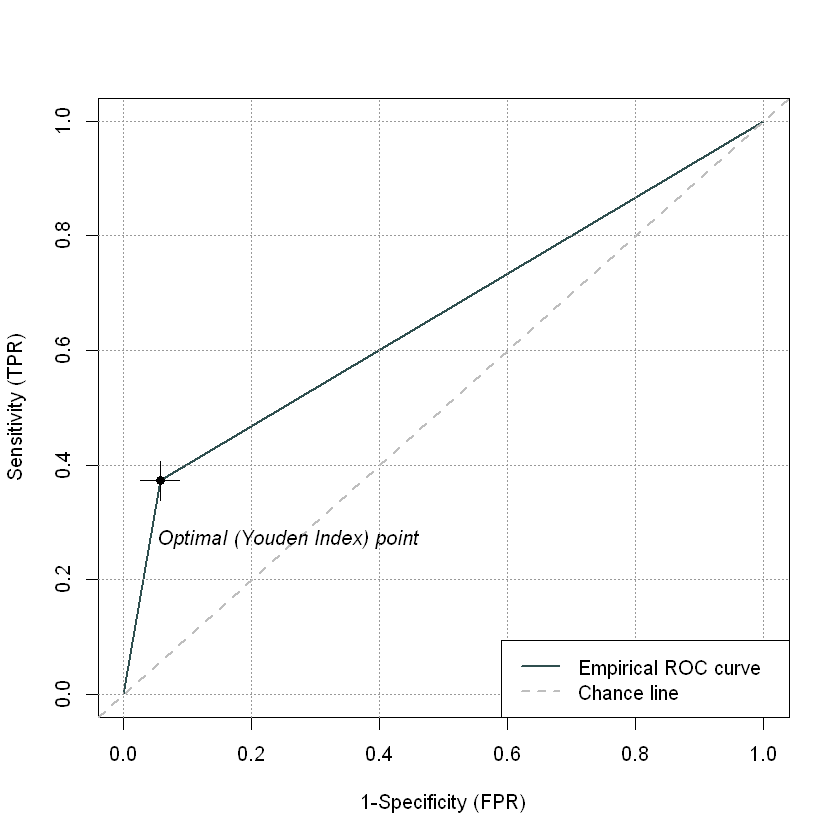

[1] 0.8251618
[1] 0.1707598


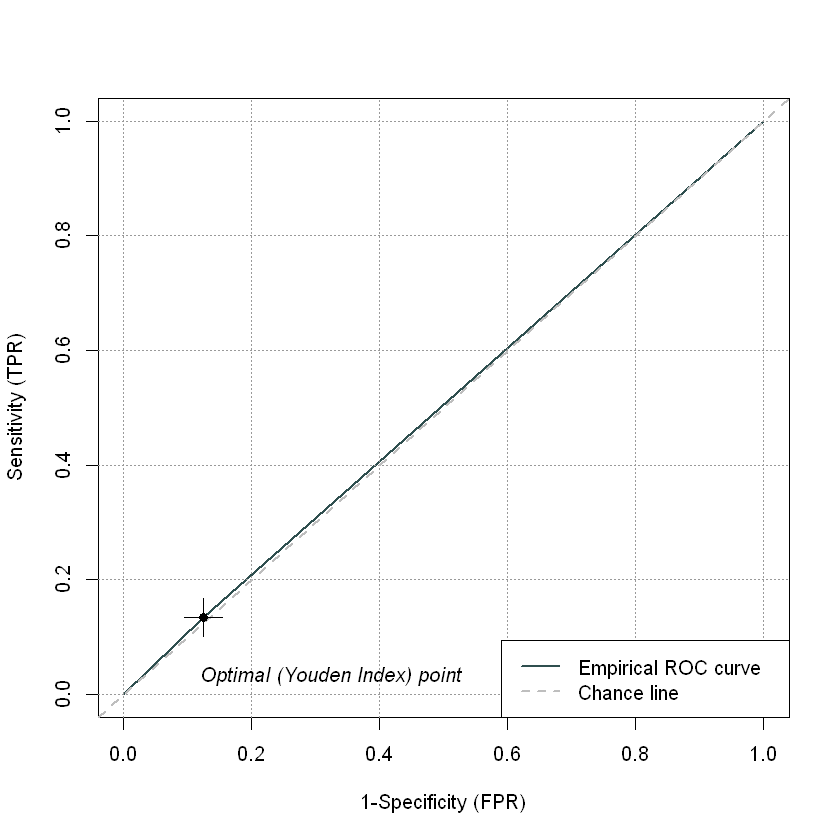

In [21]:
## forward selection - model 
## install.packages("MLmetrics")
library(MLmetrics)
library(caret)
library(ROCit)
library(InformationValue)
log_model5 <- glm(Y ~ Marital + Age + PayRec_Sep + PayRec_Aug + PayRec_Jul + PayRec_Jun + BillAmt_Sep + PaidAmt_Sep, data = train.data, family = binomial)
summary(log_model5)

## prediction on the test dataset (Logistics regression model 5)
train.log_model5_pred <- predict(log_model5, data = train.data, type = "response")
test.log_model5_pred <- predict(log_model5, data = test.data, type = "response")

## Finding the optimal cutoff 
optcut <- optimalCutoff(train.data$Y, train.log_model5_pred, optimiseFor = "misclasserror")
print(optcut)

## Classifying based on the prediction model (train dataset)
train.binpred_glm5 <- ifelse(train.log_model5_pred < optcut ,0,1)
table(train.data$Y, train.binpred_glm5)
mean(train.data$Y == train.binpred_glm5)

## Classifying based on the prediction model (test dataset)
test.binpred_glm5 <- ifelse(test.log_model5_pred < optcut ,0,1)
table(test.data$Y, test.binpred_glm5)
mean(test.data$Y == test.binpred_glm5)

## for training set (Logistics regression model 1)
train.roc5 <- rocit(train.binpred_glm5, train.data$Y)
train.roc5
plot(train.roc5)
## compute harmonic mean 0 - non default 1 default (focus on 1 (default), as they bring losses to the bank)
f1_train0 <- F1_Score(train.data$Y, train.binpred_glm5, positive = "0")
print(f1_train0)
f1_train1 <- F1_Score(train.data$Y, train.binpred_glm5, positive = "1")
print(f1_train1)

## for test set
test.roc5 <- rocit(test.binpred_glm5, test.data$Y)
test.roc5
plot(test.roc5)
## compute harmonic mean 0 - non default 1 default (focus on 1 (default), as they bring losses to the bank)
f1_test0 <- F1_Score(test.data$Y, test.binpred_glm5, positive = "0")
print(f1_test0)
f1_test1 <- F1_Score(test.data$Y, test.binpred_glm5, positive = "1")
print(f1_test1)

In [ ]:
## load relevant packages
## install.packages("InformationValue")
## install.packages("ROCit")
library(ROCit)
library(InformationValue)

## prediction on the test dataset (Model 1)
train.log_model_pred <- predict(log_model, data = train.data, type = "response")
test.log_model_pred <- predict(log_model, data = test.data, type = "response")

## Finding the optimal cutoff 
optcut <- optimalCutoff(train.data$Y, train.log_model_pred, optimiseFor = "misclasserror")
print(optcut)

## Classifying based on the prediction model (train dataset)
train.binpred_glm <- ifelse(train.log_model_pred < optcut ,0,1)
table(train.data$Y, train.binpred)
mean(train.data$Y == train.binpred)

## Classifying based on the prediction model (test dataset)
test.binpred_glm <- ifelse(test.log_model_pred < optcut ,0,1)
table(test.data$Y, test.binpred)
mean(test.data$Y == test.binpred)

## for training set (Logistics regression model 1)
train.roc <- rocit(train.binpred_glm, train.data$Y)
train.roc
plot(train.roc)

## for test set
test.roc <- rocit(test.binpred_glm, test.data$Y)
test.roc
plot(test.roc)

In [ ]:
## prediction on the test dataset (Logistics regression model 2)
train.log_model2_pred <- predict(log_model2, data = train.data, type = "response")
test.log_model2_pred <- predict(log_model2, data = test.data, type = "response")

## Finding the optimal cutoff 
optcut <- optimalCutoff(train.data$Y, train.log_model2_pred, optimiseFor = "misclasserror")
print(optcut)

## Classifying based on the prediction model (train dataset)
train.binpred_glm2 <- ifelse(train.log_model2_pred < optcut ,0,1)
table(train.data$Y, train.binpred_glm2)
mean(train.data$Y == train.binpred_glm2)

## Classifying based on the prediction model (test dataset)
test.binpred_glm2 <- ifelse(test.log_model2_pred < optcut ,0,1)
table(test.data$Y, test.binpred_glm2)
mean(test.data$Y == test.binpred_glm2)

## for training set (Logistics regression model 1)
train.roc2 <- rocit(train.binpred_glm2, train.data$Y)
train.roc2
plot(train.roc2)

## for test set
test.roc2 <- rocit(test.binpred_glm2, test.data$Y)
test.roc2
plot(test.roc2)

In [ ]:
## prediction on the test dataset (Logistics regression model 3)
train.log_model3_pred <- predict(log_model3, data = train.data, type = "response")
test.log_model3_pred <- predict(log_model3, data = test.data, type = "response")

## Finding the optimal cutoff 
optcut <- optimalCutoff(train.data$Y, train.log_model3_pred, optimiseFor = "misclasserror")
print(optcut)

## Classifying based on the prediction model (train dataset)
train.binpred_glm3 <- ifelse(train.log_model3_pred < optcut ,0,1)
table(train.data$Y, train.binpred_glm3)
mean(train.data$Y == train.binpred_glm3)

## Classifying based on the prediction model (test dataset)
test.binpred_glm3 <- ifelse(test.log_model3_pred < optcut ,0,1)
table(test.data$Y, test.binpred_glm3)
mean(test.data$Y == test.binpred_glm3)

## for training set (Logistics regression model 1)
train.roc3 <- rocit(train.binpred_glm3, train.data$Y)
train.roc3
plot(train.roc3)

## for test set
test.roc3 <- rocit(test.binpred_glm3, test.data$Y)
test.roc3
plot(test.roc3)

In [ ]:
## prediction on the test dataset (Logistics regression model 4)
train.log_model4_pred <- predict(log_model4, data = train.data, type = "response")
test.log_model4_pred <- predict(log_model4, data = test.data, type = "response")

## Finding the optimal cutoff 
optcut <- optimalCutoff(train.data$Y, train.log_model4_pred, optimiseFor = "misclasserror")
print(optcut)

## Classifying based on the prediction model (train dataset)
train.binpred_glm4 <- ifelse(train.log_model4_pred < optcut ,0,1)
table(train.data$Y, train.binpred_glm4)
mean(train.data$Y == train.binpred_glm4)

## Classifying based on the prediction model (test dataset)
test.binpred_glm4 <- ifelse(test.log_model4_pred < optcut ,0,1)
table(test.data$Y, test.binpred_glm4)
mean(test.data$Y == test.binpred_glm4)

## for training set (Logistics regression model 1)
train.roc4 <- rocit(train.binpred_glm4, train.data$Y)
train.roc4
plot(train.roc4)

## for test set
test.roc4 <- rocit(test.binpred_glm4, test.data$Y)
test.roc4
plot(test.roc4)

In [ ]:
## prediction on the test dataset (Logistics regression model 5)
train.log_model5_pred <- predict(log_model5, data = train.data, type = "response")
test.log_model5_pred <- predict(log_model5, data = test.data, type = "response")

## Finding the optimal cutoff 
optcut <- optimalCutoff(train.data$Y, train.log_model5_pred, optimiseFor = "misclasserror")
print(optcut)

## Classifying based on the prediction model (train dataset)
train.binpred_glm5 <- ifelse(train.log_model5_pred < optcut ,0,1)
table(train.data$Y, train.binpred_glm5)
mean(train.data$Y == train.binpred_glm5)

## Classifying based on the prediction model (test dataset)
test.binpred_glm5 <- ifelse(test.log_model5_pred < optcut ,0,1)
table(test.data$Y, test.binpred_glm5)
mean(test.data$Y == test.binpred_glm5)

## for training set (Logistics regression model 1)
train.roc5 <- rocit(train.binpred_glm5, train.data$Y)
train.roc5
plot(train.roc5)

## for test set
test.roc5 <- rocit(test.binpred_glm5, test.data$Y)
test.roc5
plot(test.roc5)

#### Model 2 - SVM model

In [ ]:
## Second model - SVM 

## loading relevant packages
library(e1071)

## Running the SVM model
## running best features that are listed in above
svm_model <- svm(as.factor(Y) ~ PayRec_Sep + Amt_credit + PayRec_Aug + PayRec_Jul + PayRec_Aug + BillAmt_Jun, data = train.data, type = "C-classification", kernel = "radial")
svm_model

## running worst features that are listed in above
svm_model2 <- svm(as.factor(Y) ~ Gender + Marital + Age + Edu_Lvl, data = train.data, type = "C-classification", kernel = "radial")
svm_model2

## running model with kernel linear
svm_model3 <- svm(as.factor(Y) ~ Gender + Marital + Age + Edu_Lvl, data = train.data, type = "C-classification", kernel = "linear")
svm_model3



Call:
svm(formula = as.factor(Y) ~ Marital + Age + PayRec_Sep + PayRec_Aug + 
    PayRec_Jul + PayRec_Jun + BillAmt_Sep + PaidAmt_Sep, data = train.data, 
    type = "C-classification", kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.1 

Number of Support Vectors:  6348


    actual
pred     0     1
   0 11205  2204
   1   451  1106

[1] 0.8225979

    actual
pred     0     1
   0 11208  2258
   1   437  1063

[1] 0.8199252

                                
 Method used: empirical         
 ===== Positive(s) =====        
 Number of positive(s): 3310    
 Mean of positive(s): 1.334     
 Variance of positive(s): 0.2226
 ===== Negative(s) =====        
 Number of negative(s): 11656   
 Mean of negative(s): 1.039     
 Variance of negative(s): 0.0372
 ===== AUC =====                
 Area under curve: 0.6477       
                                
     FPR    TPR
 0.00000 0.0000
 0.03869 0.3341
 1.00000 1.0000

                                 
 Method used: empirical          
 ===== Positive(s) =====         
 Number of positive(s): 3321     
 Mean of positive(s): 1.32       
 Variance of positive(s): 0.2177 
 ===== Negative(s) =====         
 Number of negative(s): 11645    
 Mean of negative(s): 1.038      
 Variance of negative(s): 0.03612
 ===== AUC =====                 
 Area under curve: 0.6413        
                                 
     FPR    TPR
 0.00000 0.0000
 0.03753 0.3201
 1.00000 1.0000

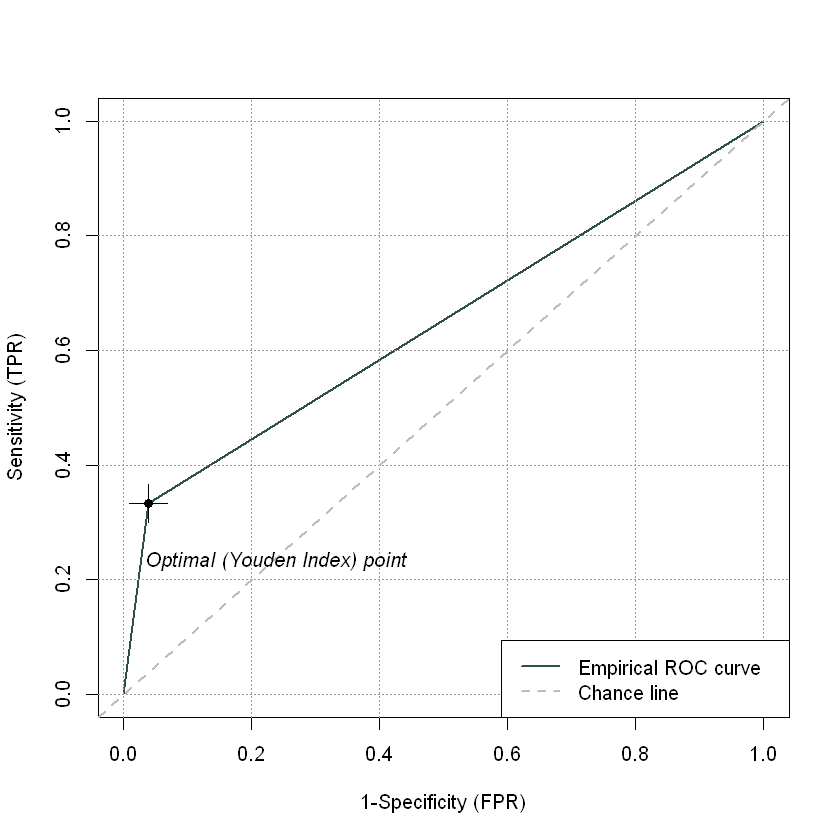

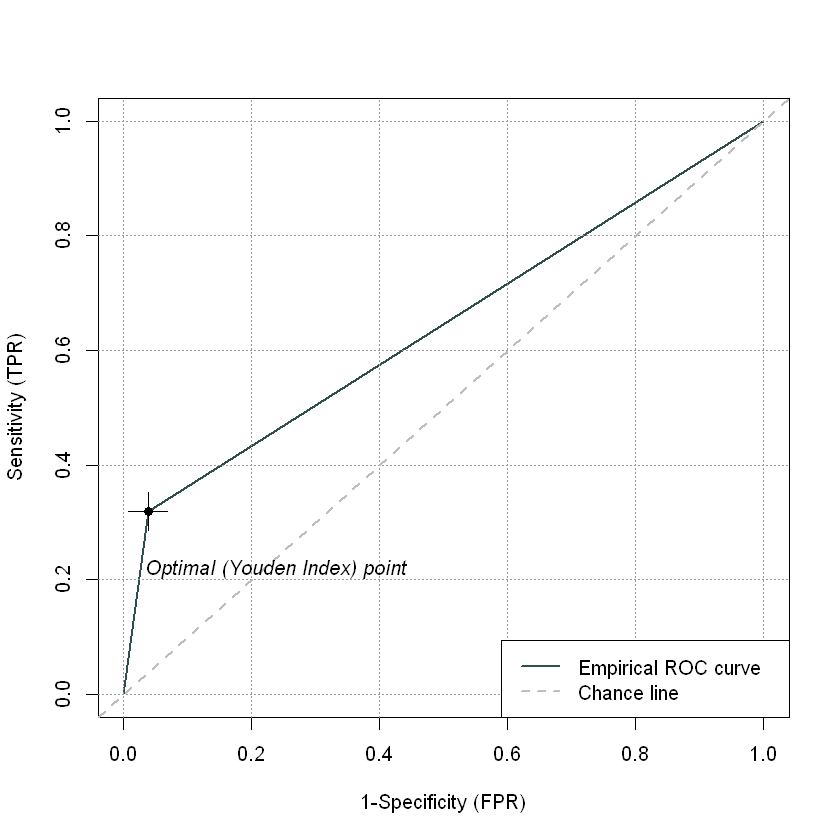

In [76]:
## forward selection 
svm_model3 <- svm(as.factor(Y) ~ Marital + Age + PayRec_Sep + PayRec_Aug + PayRec_Jul + PayRec_Jun + BillAmt_Sep + PaidAmt_Sep, data = train.data, type = "C-classification", kernel = "radial")
svm_model3

## testing and calculating the accuracy for the prediction model
results_train <- predict(svm_model3, train.data)
results_test <- predict(svm_model3, test.data)

## Classifying based on the prediction model (train dataset)
table(pred=results_train,actual=train.data$Y)
mean(results_train == train.data$Y)

## Classifying based on the prediction model (test dataset)
table(pred=results_test,actual=test.data$Y)
mean(results_test == test.data$Y)

## for training set
train.roc <- rocit(as.numeric(results_train), train.data$Y)
train.roc
plot(train.roc)
## compute harmonic mean 0 - non default 1 default (focus on 1 (default), as they bring losses to the bank)
f1_train0 <- F1_Score(train.data$Y, results_train, positive = "0")
print("train f1score 0 : %f", f1_train0)
f1_train1 <- F1_Score(train.data$Y, results_train, positive = "1")
print("train f1score 1 : %f", f1_train1)

## for test set
test.roc <- rocit(as.numeric(results_test), test.data$Y)
test.roc
plot(test.roc)
## compute harmonic mean 0 - non default 1 default (focus on 1 (default), as they bring losses to the bank)
f1_test0 <- F1_Score(train.data$Y, results_test, positive = "0")
print("test f1score 0 : %f", f1_train0)
f1_test1 <- F1_Score(train.data$Y, results_test, positive = "1")
print("test f1score 1 : %f", f1_train1)

In [ ]:
## Using ROC curve for identifying accuracy
## install.packages("ROCit")
library(ROCit)

## testing and calculating the accuracy for the prediction model
results_train <- predict(svm_model, train.data)
results_test <- predict(svm_model, test.data)

## Classifying based on the prediction model (train dataset)
table(pred=results_train,actual=train.data$Y)
mean(results_train == train.data$Y)

## Classifying based on the prediction model (test dataset)
table(pred=results_test,actual=test.data$Y)
mean(results_test == test.data$Y)

## for training set
train.roc <- rocit(as.numeric(results_train), train.data$Y)
train.roc
plot(train.roc)

## for test set
test.roc <- rocit(as.numeric(results_test), test.data$Y)
test.roc
plot(test.roc)

In [ ]:
## Using ROC curve for identifying accuracy
## install.packages("ROCit")
library(ROCit)

## testing and calculating the accuracy for the prediction model
results_train <- predict(svm_model2, train.data)
results_test <- predict(svm_model2, test.data)

## Classifying based on the prediction model (train dataset)
table(pred=results_train,actual=train.data$Y)
mean(results_train == train.data$Y)

## Classifying based on the prediction model (test dataset)
table(pred=results_test,actual=test.data$Y)
mean(results_test == test.data$Y)

## for training set
train.roc <- rocit(as.numeric(results_train), train.data$Y)
train.roc
plot(train.roc)

## for test set
test.roc <- rocit(as.numeric(results_test), test.data$Y)
test.roc
plot(test.roc)

In [ ]:
## Using ROC curve for identifying accuracy
## install.packages("ROCit")
library(ROCit)

## testing and calculating the accuracy for the prediction model
results_train <- predict(svm_model3, train.data)
results_test <- predict(svm_model3, test.data)

## Classifying based on the prediction model (train dataset)
table(pred=results_train,actual=train.data$Y)
mean(results_train == train.data$Y)

## Classifying based on the prediction model (test dataset)
table(pred=results_test,actual=test.data$Y)
mean(results_test == test.data$Y)

## for training set
train.roc <- rocit(as.numeric(results_train), train.data$Y)
train.roc
plot(train.roc)

## for test set
test.roc <- rocit(as.numeric(results_test), test.data$Y)
test.roc
plot(test.roc)

#### Model 3 - Neural Network

# weights:  71
initial  value 15686.507022 
iter  10 value 7830.203493
iter  20 value 7803.911948
iter  30 value 7794.222321
iter  40 value 7793.291764
iter  50 value 7792.269408
iter  60 value 7788.197436
iter  70 value 7711.036514
iter  80 value 7646.193182
iter  90 value 7572.257432
iter 100 value 7402.343330
iter 110 value 7116.163672
iter 120 value 6836.099091
iter 130 value 6647.424844
iter 140 value 6626.699709
iter 150 value 6626.547531
iter 150 value 6626.547530
final  value 6626.546815 
converged
# weights:  91
initial  value 7910.258706 
iter  10 value 7906.122564
iter  20 value 7878.678923
iter  30 value 7856.649733
iter  40 value 7846.442336
iter  50 value 7844.104208
iter  60 value 7839.010141
iter  70 value 7834.411144
iter  80 value 7831.803909
iter  90 value 7830.445583
iter 100 value 7829.554754
iter 110 value 7827.958438
iter 120 value 7827.197155
iter 130 value 7826.758052
iter 140 value 7826.393914
iter 150 value 7826.193454
iter 160 value 7825.954099
iter 170 valu

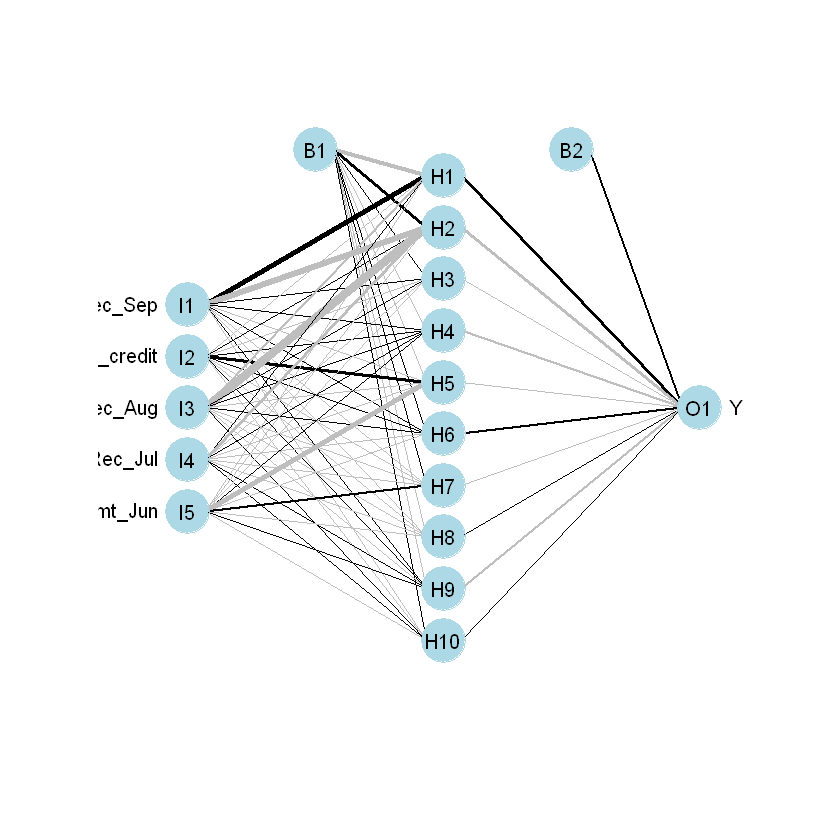

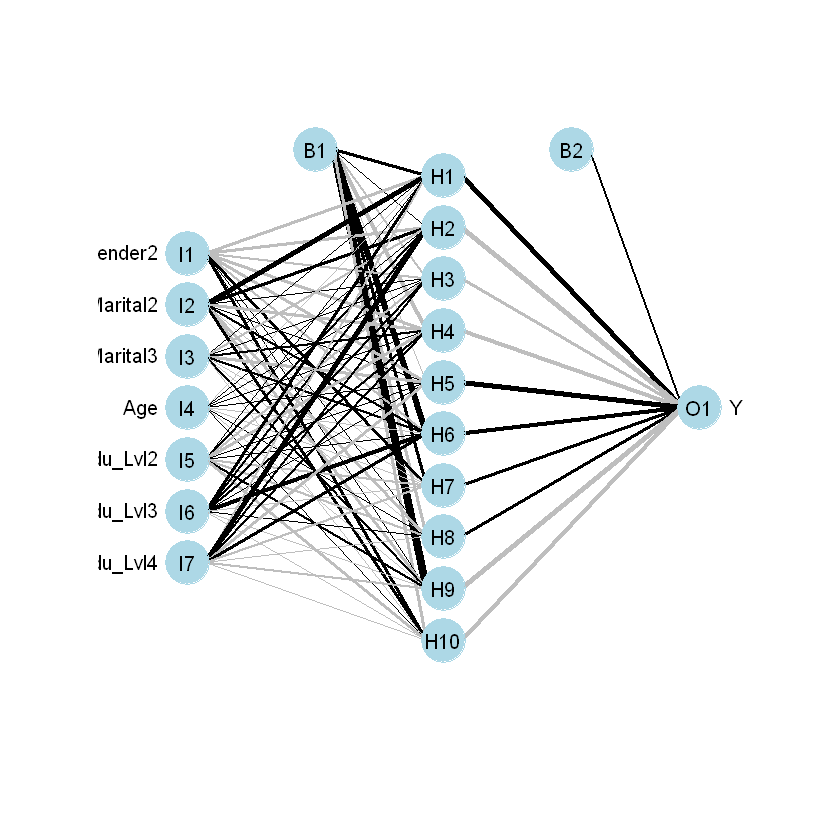

In [7]:
## Third model - Neural Network
## loading relevant packages
## install.packages("NeuralNetTools")
library(NeuralNetTools)
library(nnet)

## Running the neural network model (best model)
set.seed(123)
nn_model <- nnet(Y ~ PayRec_Sep + Amt_credit + PayRec_Aug + PayRec_Jul + PayRec_Aug + BillAmt_Jun, data = train.data, maxit = 1000, size = 10, decay = 0.08)
plotnet(nn_model)

nn_model2 <- nnet(Y ~ Gender + Marital + Age + Edu_Lvl, data = train.data, maxit = 1000, size = 10, decay = 0.08)
plotnet(nn_model2)


Attaching package: 'MLmetrics'

The following object is masked from 'package:base':

    Recall



# weights:  91
initial  value 7963.525811 
iter  10 value 7891.204925
iter  20 value 7832.116831
iter  30 value 7674.655023
iter  40 value 7574.054802
iter  50 value 7354.616213
iter  60 value 6899.644009
iter  70 value 6844.716008
iter  80 value 6835.162300
iter  90 value 6810.804471
iter 100 value 6708.930826
iter 110 value 6677.763109
iter 120 value 6670.805097
iter 130 value 6668.787890
iter 140 value 6660.579424
final  value 6659.899997 
converged


[1] "Train Accuracy: 0.820593"

[1] "Train Harmonic Mean: 0.513858"

[1] "train f1score 0 : 0.892251"

[1] "train f1score 1 : 0.464393"

[1] "Train Accuracy: 0.817653"

[1] "Train Harmonic Mean: 0.500952"

[1] "test f1score 0 : 0.892251"

[1] "test f1score 1 : 0.464393"

                                 
 Method used: empirical          
 ===== Positive(s) =====         
 Number of positive(s): 3310     
 Mean of positive(s): 0.3517     
 Variance of positive(s): 0.2281 
 ===== Negative(s) =====         
 Number of negative(s): 11656    
 Mean of negative(s): 0.04624    
 Variance of negative(s): 0.04411
 ===== AUC =====                 
 Area under curve: 0.6527        
                                 
     FPR    TPR
 0.00000 0.0000
 0.04624 0.3517
 1.00000 1.0000

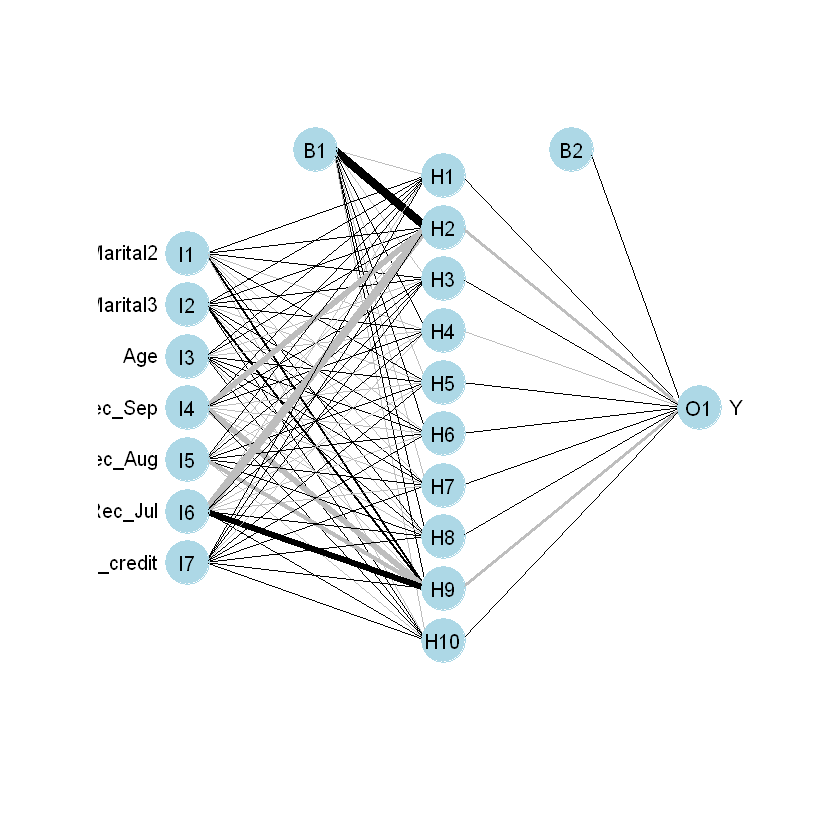

                                 
 Method used: empirical          
 ===== Positive(s) =====         
 Number of positive(s): 3321     
 Mean of positive(s): 0.3397     
 Variance of positive(s): 0.2244 
 ===== Negative(s) =====         
 Number of negative(s): 11645    
 Mean of negative(s): 0.04603    
 Variance of negative(s): 0.04391
 ===== AUC =====                 
 Area under curve: 0.6468        
                                 
     FPR    TPR
 0.00000 0.0000
 0.04603 0.3397
 1.00000 1.0000

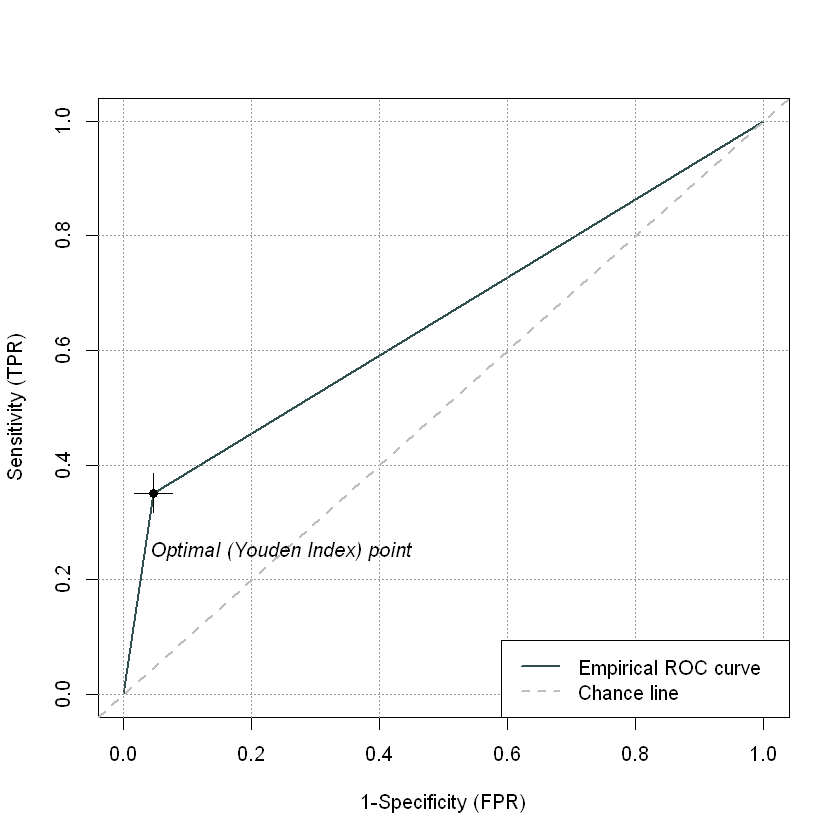

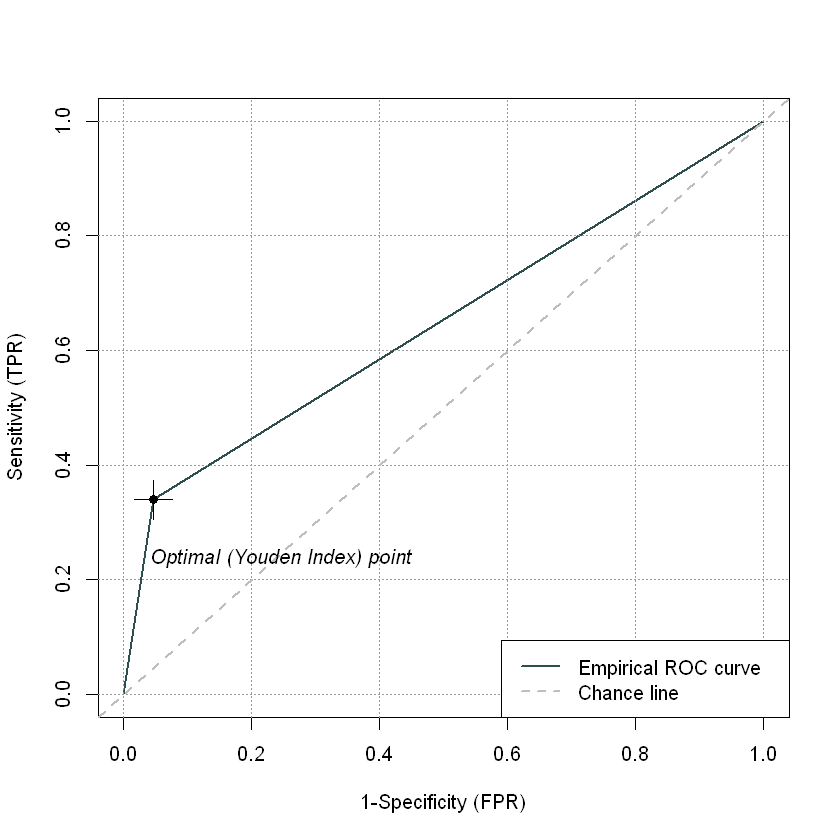

In [11]:
library(ROCit)
library(MLmetrics)
harmonic_mean <- function(table) {
  tab <- data.frame(table)
  return (1/(0.5 * ((tab[1,3]+tab[2,3])/tab[1,3] + (tab[3,3]+tab[4,3])/tab[4,3])))
}

## running with forward selection
nn_model2 <- nnet(Y ~ Marital + Age + PayRec_Sep + PayRec_Aug + PayRec_Jul + Amt_credit, data = train.data, maxit = 1000, size = 10, decay = 0.08)
plotnet(nn_model2)

## testing and calculating the accuracy for the prediction model (worst case)
results_train <- predict(nn_model2, train.data, type = c("class"))
results_test <- predict(nn_model2, test.data, type = c("class"))

## Classifying based on the prediction model (train dataset)
train_table_nn <- table(pred=results_train,actual=train.data$Y)
sprintf("Train Accuracy: %f", mean(results_train == train.data$Y))
sprintf("Train Harmonic Mean: %f", harmonic_mean(train_table_nn))
## compute harmonic mean 0 - non default 1 default (focus on 1 (default), as they bring losses to the bank)
f1_train0 <- F1_Score(train.data$Y, results_train, positive = "0")
sprintf("train f1score 0 : %f", f1_train0)
f1_train1 <- F1_Score(train.data$Y, results_train, positive = "1")
sprintf("train f1score 1 : %f", f1_train1)

## Classifying based on the prediction model (test dataset)
test_table_nn <- table(pred=results_test,actual=test.data$Y)
sprintf("Train Accuracy: %f", mean(results_test == test.data$Y))
sprintf("Train Harmonic Mean: %f", harmonic_mean(test_table_nn))
## compute harmonic mean 0 - non default 1 default (focus on 1 (default), as they bring losses to the bank)
f1_test0 <- F1_Score(train.data$Y, results_test, positive = "0")
sprintf("test f1score 0 : %f", f1_train0)
f1_test1 <- F1_Score(train.data$Y, results_test, positive = "1")
sprintf("test f1score 1 : %f", f1_train1)

## for training set
train.roc <- rocit(as.numeric(results_train), train.data$Y)
train.roc
plot(train.roc)

## for test set
test.roc <- rocit(as.numeric(results_test), test.data$Y)
test.roc
plot(test.roc)

    actual
pred     0     1
   0 11162  2186
   1   494  1124

[1] 0.8209274

    actual
pred     0     1
   0 11172  2221
   1   473  1100

[1] 0.819992

                                 
 Method used: empirical          
 ===== Positive(s) =====         
 Number of positive(s): 3310     
 Mean of positive(s): 0.3396     
 Variance of positive(s): 0.2243 
 ===== Negative(s) =====         
 Number of negative(s): 11656    
 Mean of negative(s): 0.04238    
 Variance of negative(s): 0.04059
 ===== AUC =====                 
 Area under curve: 0.6486        
                                 
     FPR    TPR
 0.00000 0.0000
 0.04238 0.3396
 1.00000 1.0000

                                 
 Method used: empirical          
 ===== Positive(s) =====         
 Number of positive(s): 3321     
 Mean of positive(s): 0.3312     
 Variance of positive(s): 0.2216 
 ===== Negative(s) =====         
 Number of negative(s): 11645    
 Mean of negative(s): 0.04062    
 Variance of negative(s): 0.03897
 ===== AUC =====                 
 Area under curve: 0.6453        
                                 
     FPR    TPR
 0.00000 0.0000
 0.04062 0.3312
 1.00000 1.0000

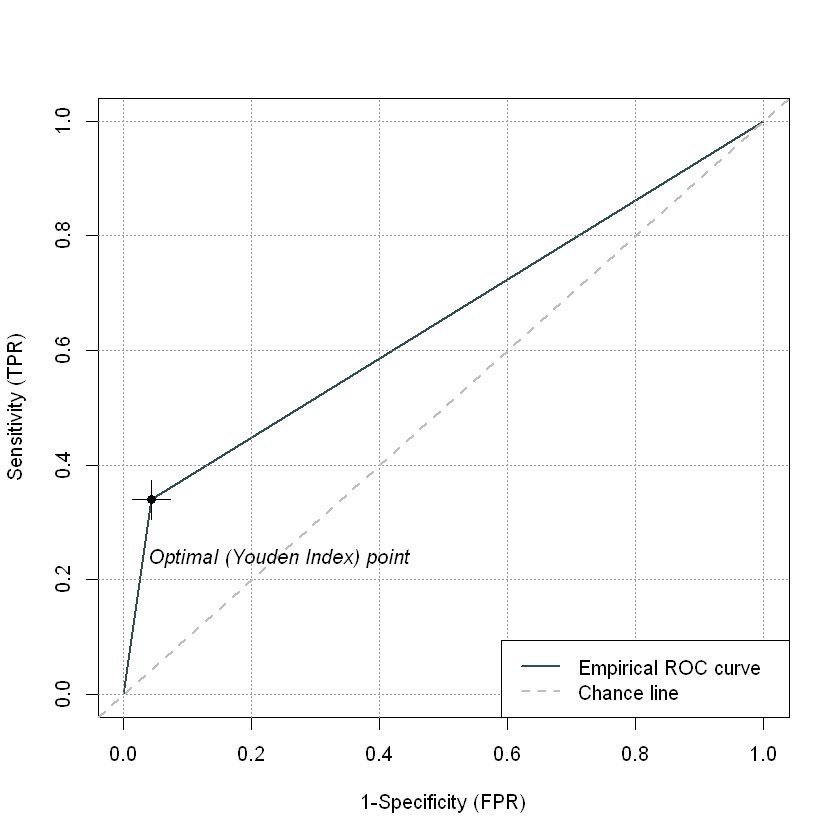

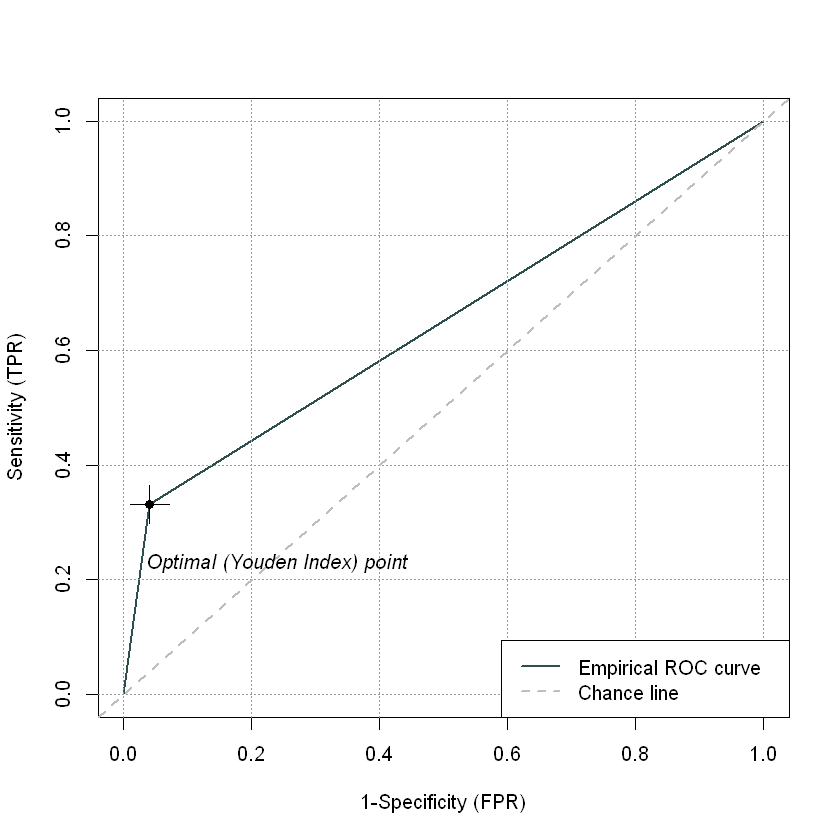

In [61]:
## testing and calculating the accuracy for the prediction model (best model)
results_train <- predict(nn_model, train.data, type = c("class"))
results_test <- predict(nn_model, test.data, type = c("class"))

## Classifying based on the prediction model (train dataset)
table(pred=results_train,actual=train.data$Y)
mean(results_train == train.data$Y)

## Classifying based on the prediction model (test dataset)
table(pred=results_test,actual=test.data$Y)
mean(results_test == test.data$Y)

## for training set
train.roc <- rocit(as.numeric(results_train), train.data$Y)
train.roc
plot(train.roc)

## for test set
test.roc <- rocit(as.numeric(results_test), test.data$Y)
test.roc
plot(test.roc)

    actual
pred     0     1
   0 11656  3310

[1] 0.778832

    actual
pred     0     1
   0 11645  3321

[1] 0.778097

                             
 Method used: empirical      
 ===== Positive(s) =====     
 Number of positive(s): 3310 
 Mean of positive(s): 0      
 Variance of positive(s): 0  
 ===== Negative(s) =====     
 Number of negative(s): 11656
 Mean of negative(s): 0      
 Variance of negative(s): 0  
 ===== AUC =====             
 Area under curve: 0.5       
                             
 FPR TPR
   0   0
   1   1

                             
 Method used: empirical      
 ===== Positive(s) =====     
 Number of positive(s): 3321 
 Mean of positive(s): 0      
 Variance of positive(s): 0  
 ===== Negative(s) =====     
 Number of negative(s): 11645
 Mean of negative(s): 0      
 Variance of negative(s): 0  
 ===== AUC =====             
 Area under curve: 0.5       
                             
 FPR TPR
   0   0
   1   1

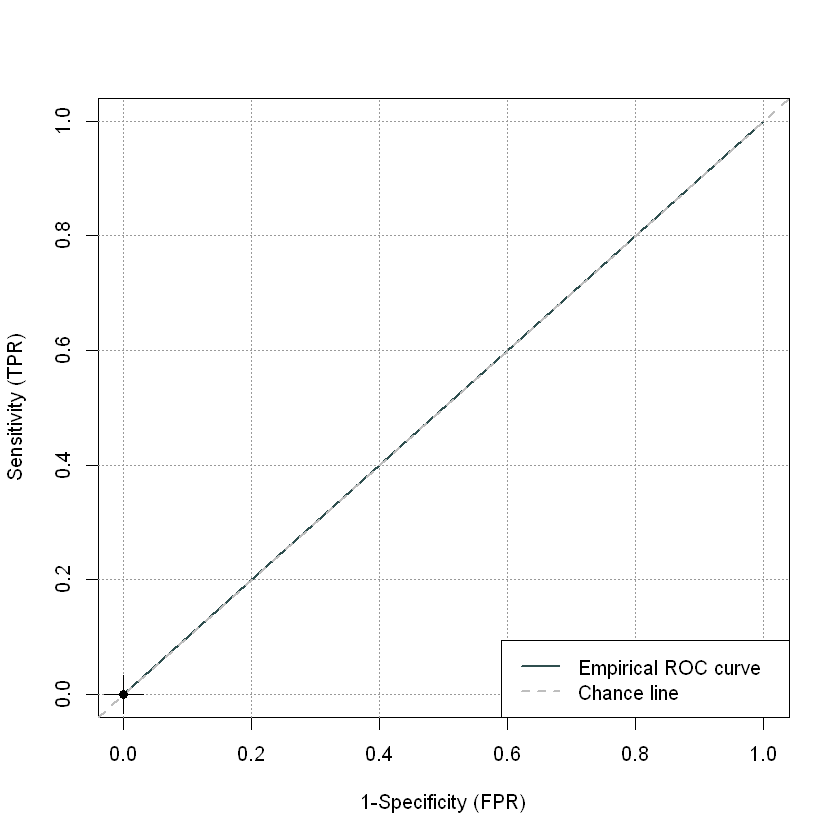

In [62]:
## testing and calculating the accuracy for the prediction model (worst case)
results_train <- predict(nn_model2, train.data, type = c("class"))
results_test <- predict(nn_model2, test.data, type = c("class"))

## Classifying based on the prediction model (train dataset)
table(pred=results_train,actual=train.data$Y)
mean(results_train == train.data$Y)

## Classifying based on the prediction model (test dataset)
table(pred=results_test,actual=test.data$Y)
mean(results_test == test.data$Y)

## for training set
train.roc <- rocit(as.numeric(results_train), train.data$Y)
train.roc
plot(train.roc)

## for test set
test.roc <- rocit(as.numeric(results_test), test.data$Y)
test.roc
plot(test.roc)

#### Model 4 - Random Forest

In [63]:
## Fourth model - Random Forest
## loading relevant packages
library(randomForest)

## Running the random forest model (best model)
set.seed(1234)
rf_model <- randomForest(as.factor(Y) ~ PayRec_Sep + Amt_credit + PayRec_Aug + PayRec_Jul + PayRec_Aug + BillAmt_Jun, data = train.data, proximity = TRUE) 

## running worst model for reference
rf_model2 <- randomForest(as.factor(Y) ~ Gender + Marital + Age + Edu_Lvl, data = train.data, proximity = TRUE) 

In [ ]:
## forward feature selection
rf_model <- randomForest(as.factor(Y) ~ Marital + Age + PayRec_Sep + PayRec_Aug + PayRec_Jul + PayRec_Jun + BillAmt_Sep + PaidAmt_Sep, data = train.data, proximity = TRUE) 

## testing and calculating the accuracy for the prediction model
results_train <- predict(rf_model, train.data)
results_test <- predict(rf_model, test.data)

## Classifying based on the prediction model (train dataset)
table(pred=results_train,actual=train.data$Y)
mean(results_train == train.data$Y)

## Classifying based on the prediction model (test dataset)
table(pred=results_test,actual=test.data$Y)
mean(results_test == test.data$Y)

## for training set
train.roc <- rocit(as.numeric(results_train), train.data$Y)
train.roc
plot(train.roc)

## for test set
test.roc <- rocit(as.numeric(results_test), test.data$Y)
test.roc
plot(test.roc)

    actual
pred     0     1
   0 11308  1860
   1   348  1450

[1] 0.8524656

    actual
pred     0     1
   0 11075  2205
   1   570  1116

[1] 0.8145797

                                 
 Method used: empirical          
 ===== Positive(s) =====         
 Number of positive(s): 3310     
 Mean of positive(s): 1.438      
 Variance of positive(s): 0.2462 
 ===== Negative(s) =====         
 Number of negative(s): 11656    
 Mean of negative(s): 1.03       
 Variance of negative(s): 0.02897
 ===== AUC =====                 
 Area under curve: 0.7041        
                                 
     FPR    TPR
 0.00000 0.0000
 0.02986 0.4381
 1.00000 1.0000

                                 
 Method used: empirical          
 ===== Positive(s) =====         
 Number of positive(s): 3321     
 Mean of positive(s): 1.336      
 Variance of positive(s): 0.2232 
 ===== Negative(s) =====         
 Number of negative(s): 11645    
 Mean of negative(s): 1.049      
 Variance of negative(s): 0.04656
 ===== AUC =====                 
 Area under curve: 0.6435        
                                 
     FPR   TPR
 0.00000 0.000
 0.04895 0.336
 1.00000 1.000

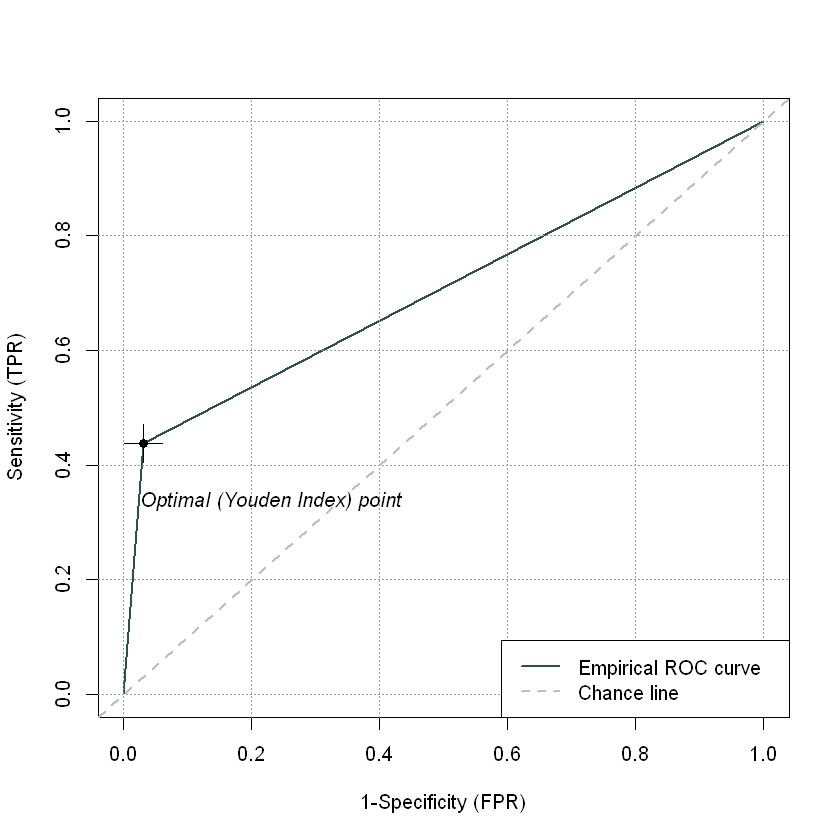

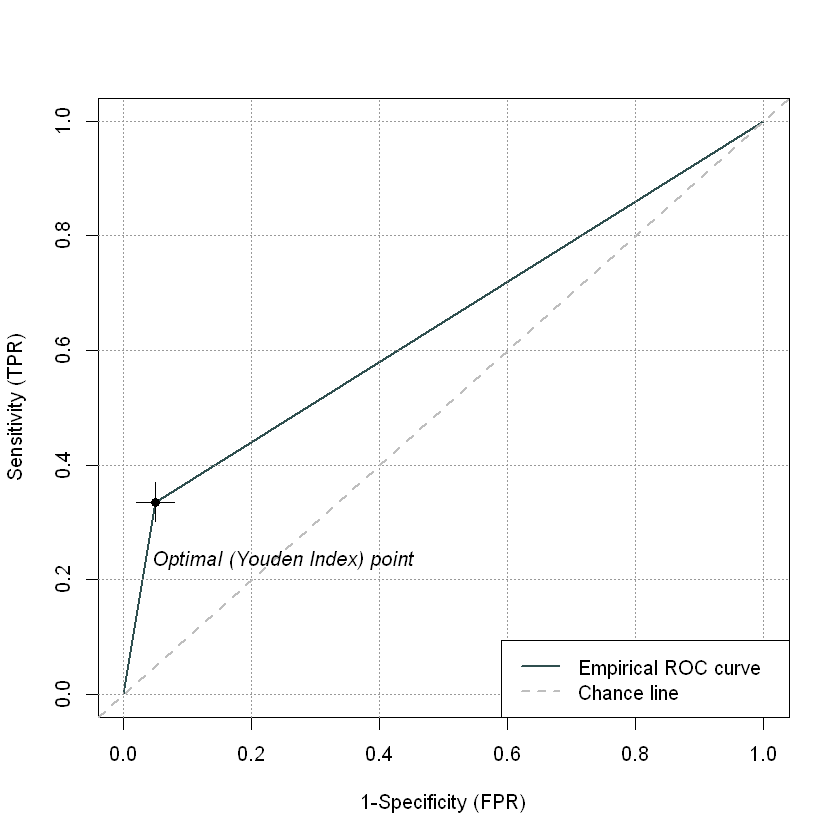

In [67]:
## Reviewing the results
#rf_model
#importance(rf_model)

## testing and calculating the accuracy for the prediction model
results_train <- predict(rf_model, train.data)
results_test <- predict(rf_model, test.data)

## Classifying based on the prediction model (train dataset)
table(pred=results_train,actual=train.data$Y)
mean(results_train == train.data$Y)

## Classifying based on the prediction model (test dataset)
table(pred=results_test,actual=test.data$Y)
mean(results_test == test.data$Y)

## for training set
train.roc <- rocit(as.numeric(results_train), train.data$Y)
train.roc
plot(train.roc)

## for test set
test.roc <- rocit(as.numeric(results_test), test.data$Y)
test.roc
plot(test.roc)

    actual
pred     0     1
   0 11656  3305
   1     0     5

[1] 0.7791661

    actual
pred     0     1
   0 11643  3320
   1     2     1

[1] 0.7780302

                                  
 Method used: empirical           
 ===== Positive(s) =====          
 Number of positive(s): 3310      
 Mean of positive(s): 1.002       
 Variance of positive(s): 0.001509
 ===== Negative(s) =====          
 Number of negative(s): 11656     
 Mean of negative(s): 1           
 Variance of negative(s): 0       
 ===== AUC =====                  
 Area under curve: 0.5008         
                                  
 FPR      TPR
   0 0.000000
   0 0.001511
   1 1.000000

                                   
 Method used: empirical            
 ===== Positive(s) =====           
 Number of positive(s): 3321       
 Mean of positive(s): 1            
 Variance of positive(s): 0.0003011
 ===== Negative(s) =====           
 Number of negative(s): 11645      
 Mean of negative(s): 1            
 Variance of negative(s): 0.0001717
 ===== AUC =====                   
 Area under curve: 0.5001          
                                   
       FPR       TPR
 0.0000000 0.0000000
 0.0001717 0.0003011
 1.0000000 1.0000000

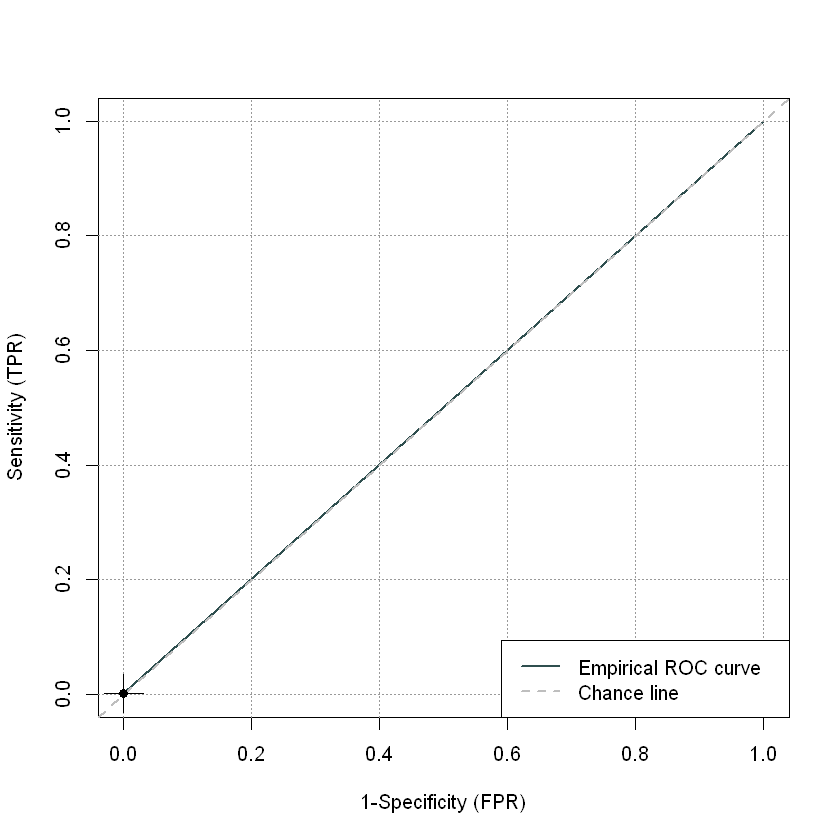

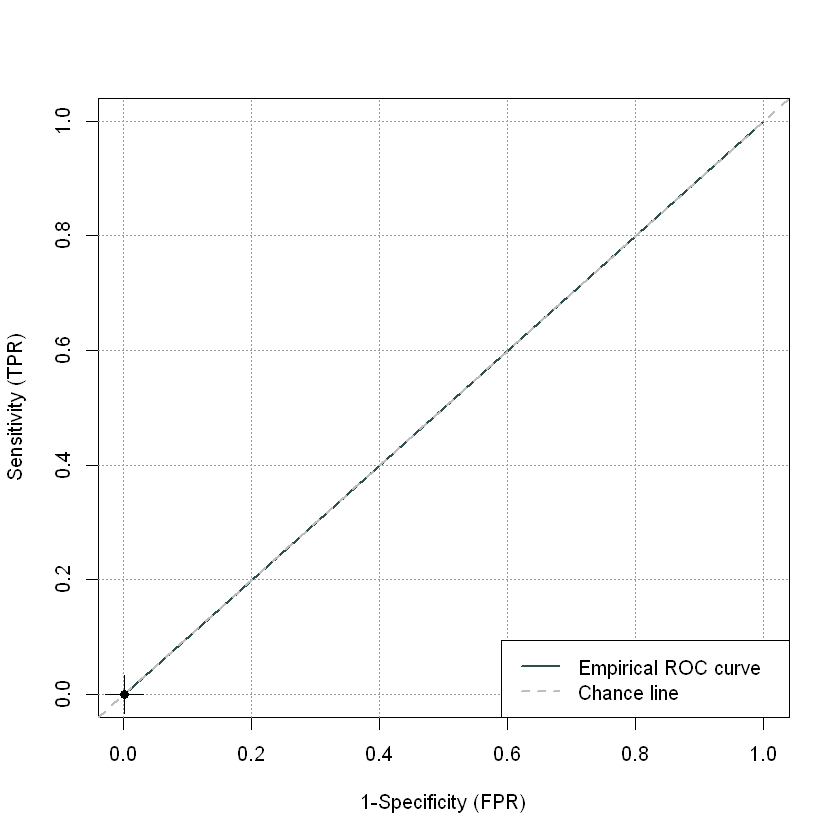

In [68]:
## Reviewing the results
#rf_model2
#importance(rf_model2)

## testing and calculating the accuracy for the prediction model
results_train <- predict(rf_model2, train.data)
results_test <- predict(rf_model2, test.data)

## Classifying based on the prediction model (train dataset)
table(pred=results_train,actual=train.data$Y)
mean(results_train == train.data$Y)

## Classifying based on the prediction model (test dataset)
table(pred=results_test,actual=test.data$Y)
mean(results_test == test.data$Y)

## for training set
train.roc <- rocit(as.numeric(results_train), train.data$Y)
train.roc
plot(train.roc)

## for test set
test.roc <- rocit(as.numeric(results_test), test.data$Y)
test.roc
plot(test.roc)

In [71]:
# Number of variables selected at each split is denoted by mtry in randomforest
# Find out optimal mtry, default is 4
mtry <- tuneRF(train.data[-25],train.data$Y, ntreeTry=500,
               stepFactor=1.5,improve=0.01, trace=TRUE, plot=TRUE)
best.m <- mtry[mtry[, 2] == min(mtry[, 2]), 1]
print(mtry)
print(best.m)

mtry = 4  OOB error = 0% 
Searching left ...
mtry = 3 	OOB error = 0% 
NaN 0.01 


ERROR: Error in if (Improve > improve) {: missing value where TRUE/FALSE needed


We selected the best model and describe the best model accordingly. 